In [38]:
import geopandas
import pandas as pd
import sys
sys.path.insert(0, '..')
from read_config import read_yaml
from gerrychain import Graph, Partition

In [39]:
config = read_yaml('../preprocessing_config.yaml')
main_path = '../../'
cb_path = main_path + config['PREPROCESSING']['DATA']['NEVADA']['PROCESSED']['ENACTED']['CENSUS_BLOCKS']
cb = geopandas.read_file(cb_path)

### Construct graph of census block nodes with neighbors as edges

In [40]:
graph = Graph.from_geodataframe(cb)
partition = Partition(graph, assignment='districtId')

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/graph.py:162: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()


<AxesSubplot:>

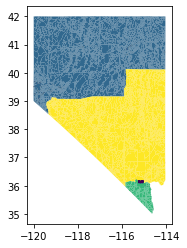

In [41]:
partition.plot()

### Extract edges

In [42]:
edges = []
for (i,j) in partition.graph.edges:
    src_id = partition.graph.nodes[i]['blockId']
    dest_id = partition.graph.nodes[j]['blockId']
    edges.append([src_id,dest_id])
edges = pd.DataFrame(edges, columns=['blockIdFrom','blockIdTo'])
edges['districtingId'] = 'enacted'
edges = edges[['districtingId', 'blockIdFrom', 'blockIdTo']]

In [43]:
edges_path = main_path + config['PREPROCESSING']['DATA']['NEVADA']['PROCESSED']['ENACTED']['CENSUS_BLOCKS_EDGES']
edges.to_csv(edges_path)